# Lead-Scoring-Case-Study
Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Data
You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

## Goals of the Case Study
Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted

### Step 1: Importing and Merging Data
### Step 2: Inspecting the Dataframe
### Step 3: Data Preparation
### Step 4: Data Visualisation
### Step 5: Test-Train Split
### Step 6: Feature Scaling
### Step 7: Looking at Correlations
### Step 8: Model Building
### Step 9:Model evaluation
### Step 10: Plotting the ROC Curve
### Step 11: Finding Optimal Cutoff Point
### Step 12: Making predictions on the test set


# Step 1: Importing and Merging Data

In [1]:

import warnings
warnings.filterwarnings('ignore')
#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import data
lead=pd.read_csv('Leads.csv')

In [3]:
#look at top 5 rows
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Step 2: Inspecting the Dataframe

In [4]:
#how many rows?
lead.shape

(9240, 37)

In [5]:
#how the variable distribution looks like?
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# how many categorical variables are there, where we might have to create dummy vars?
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Step 3: Data Preparation

In [7]:
# Check the number of missing values in each column

(lead.isnull().sum()/len(lead.index))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

There are nearly 7-8 variables for which we have ~50% of the values are null

In [8]:
(lead.isnull().sum()/len(lead.index))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [9]:
#remove all the columns with 40% and more  missing values
for col in lead.columns:
    if (lead[col].isnull().sum()/len(lead.index))*100 >40:
        lead.drop(col, 1, inplace=True)

In [10]:
lead.shape

(9240, 32)

[Text(0.5, 0, 'Lead Source'), Text(0, 0.5, '% in dataset')]

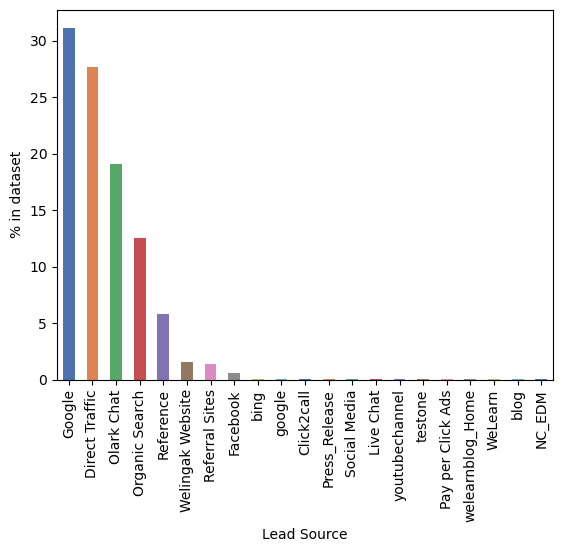

In [11]:
# for lead source
# Missing value imputation for lead source
plt_missing_cat = (lead['Lead Source'].value_counts(normalize=True)*100).plot.bar(color=sns.color_palette('deep'))
plt_missing_cat.set(xlabel = 'Lead Source', ylabel = '% in dataset')

majority of the volume is under google, so replace the missing values with mode

In [12]:
lead['Lead Source'] = lead['Lead Source'].replace(np.nan, 'Google')

In [13]:
lead['Lead Source'].value_counts(normalize=True)

Google               0.314286
Direct Traffic       0.275216
Olark Chat           0.189935
Organic Search       0.124892
Reference            0.057792
Welingak Website     0.015368
Referral Sites       0.013528
Facebook             0.005952
bing                 0.000649
google               0.000541
Click2call           0.000433
Press_Release        0.000216
Social Media         0.000216
Live Chat            0.000216
youtubechannel       0.000108
testone              0.000108
Pay per Click Ads    0.000108
welearnblog_Home     0.000108
WeLearn              0.000108
blog                 0.000108
NC_EDM               0.000108
Name: Lead Source, dtype: float64

<AxesSubplot:xlabel='TotalVisits'>

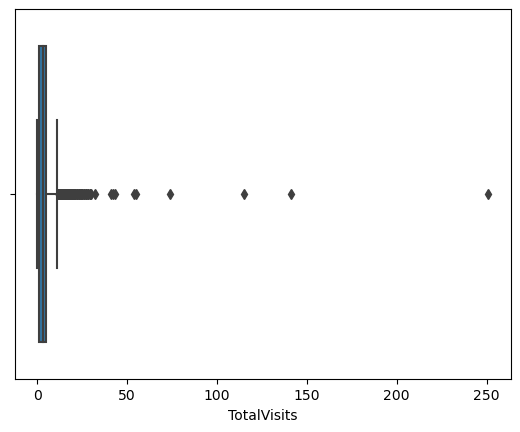

In [14]:
# Missing value imputation for TotalVisits Page Views Per Visit
sns.boxplot(lead['TotalVisits'])

<AxesSubplot:xlabel='Page Views Per Visit'>

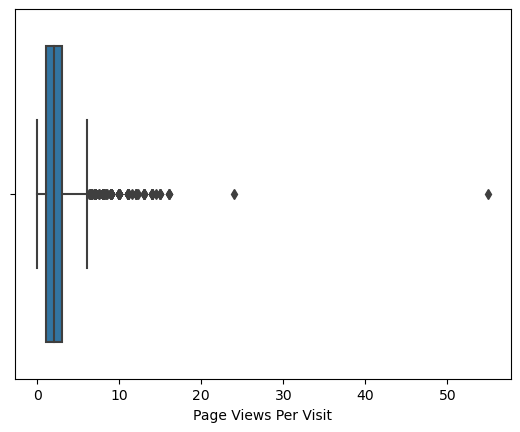

In [15]:
# Missing value imputation for TotalVisits Page Views Per Visit
sns.boxplot(lead['Page Views Per Visit'])

most of the points are beyond IQR, its better to drop the missing rows


In [16]:
lead = lead[~pd.isnull(lead['Page Views Per Visit'])]

In [17]:
(lead.isnull().sum()/len(lead.index))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       0.000000
Total Time Spent on Website                       0.000000
Page Views Per Visit                              0.000000
Last Activity                                     0.000000
Country                                          25.530045
Specialization                                   15.720092
How did you hear about X Education               24.167857
What is your current occupation                  29.473800
What matters most to you in choosing a course    29.682522
Search                                            0.0000

[Text(0.5, 0, 'Country'), Text(0, 0.5, '% in dataset')]

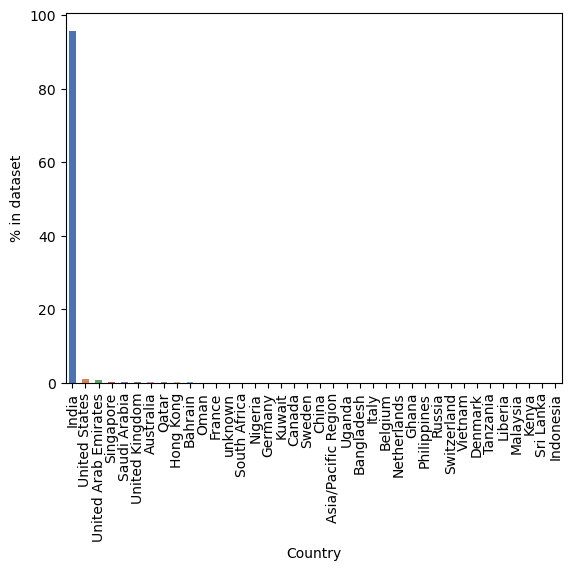

In [18]:
#for Country
plt_missing_cat = (lead['Country'].value_counts(normalize=True)*100).plot.bar(color=sns.color_palette('deep'))
plt_missing_cat.set(xlabel = 'Country', ylabel = '% in dataset')

#for majority of leads we have INdia as country, so it is better to drop this variable

[Text(0.5, 0, 'Specialization'), Text(0, 0.5, '% in dataset')]

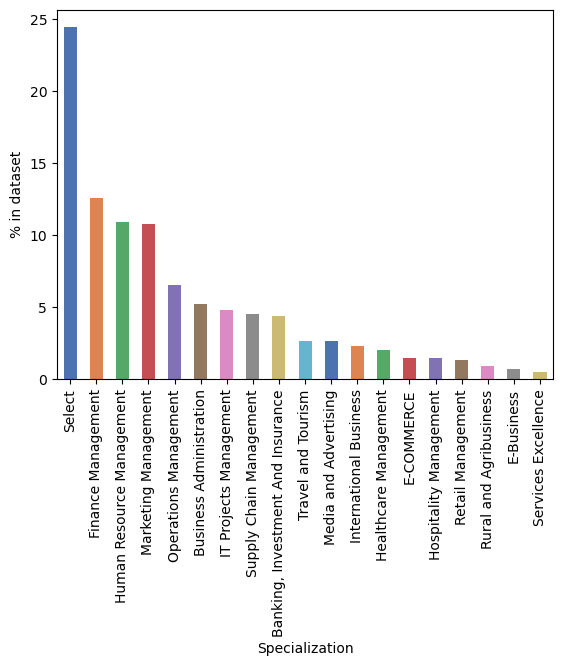

In [19]:
#for Specialization
plt_missing_cat = (lead['Specialization'].value_counts(normalize=True)*100).plot.bar(color=sns.color_palette('deep'))
plt_missing_cat.set(xlabel = 'Specialization', ylabel = '% in dataset')

For 15% of the population the specialization is missing and for another 25% this field has value like select that also signifies missing. we can replace the missing values and 'Select' values with a new category called 'missing'

In [20]:
# To convert 'Select' values to NaN
lead = lead.replace('Select', np.nan)

In [21]:
lead['Specialization'] = lead['Specialization'].replace(np.nan, 'Missing')

In [22]:

#remove all the columns with 40% and more  missing values
for col in lead.columns:
    if (lead[col].isnull().sum()/len(lead.index))*100 >40:
        lead.drop(col, 1, inplace=True)

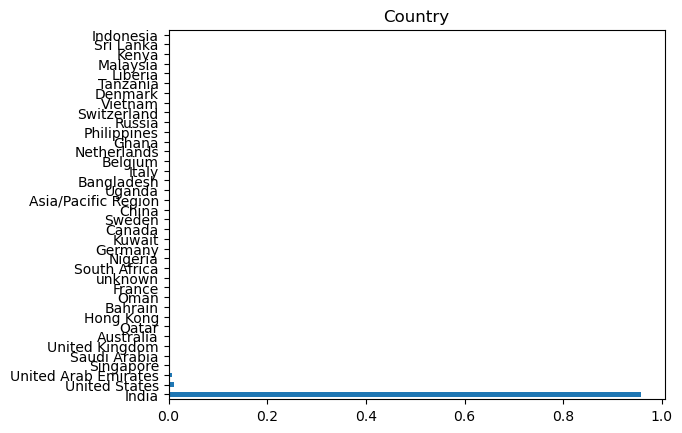

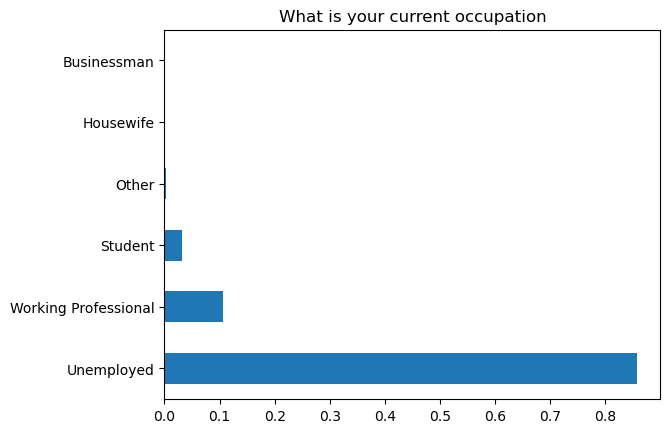

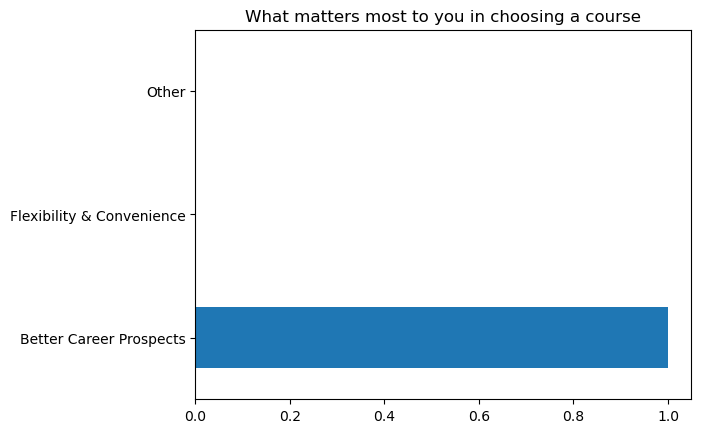

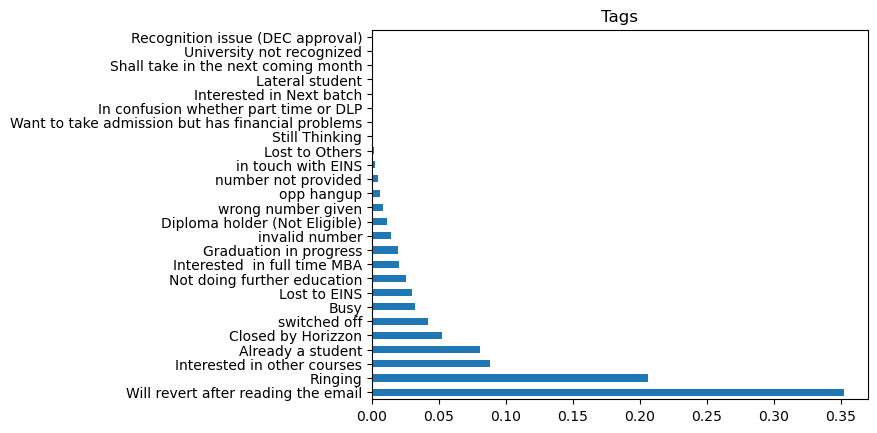

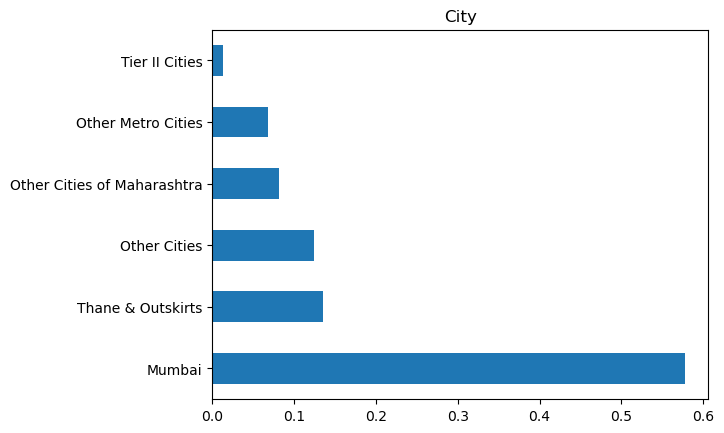

In [23]:
#What is your current occupation
cat_vars=['Country','What is your current occupation','What matters most to you in choosing a course', 'Tags','City']

for col in cat_vars:
    plt.title(col)
    lead[col].value_counts(normalize=True).plot.barh()
    plt.show()

variables like country, 'What matters most to you in choosing a course' has most of the volume concentrated in in one of the category. It is better to delete these variables

Variables like What is your current occupation, tags, city dominated by one category, just immpute those variables with the mode

In [24]:
lead['City'] = lead['City'].replace(np.nan, 'Mumbai')
lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'Unemployed')
lead['Tags'] = lead['Tags'].replace(np.nan, 'Will revert after reading the email')



In [25]:
lead.drop(['Country','What matters most to you in choosing a course'], 1, inplace=True)

In [26]:
(lead.isnull().sum()/len(lead.index))*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses  

In [27]:
# DIstribute variables into categorical vs continuous
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9103 non-null   object 
 1   Lead Number                               9103 non-null   int64  
 2   Lead Origin                               9103 non-null   object 
 3   Lead Source                               9103 non-null   object 
 4   Do Not Email                              9103 non-null   object 
 5   Do Not Call                               9103 non-null   object 
 6   Converted                                 9103 non-null   int64  
 7   TotalVisits                               9103 non-null   float64
 8   Total Time Spent on Website               9103 non-null   int64  
 9   Page Views Per Visit                      9103 non-null   float64
 10  Last Activity                       

In [28]:
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [29]:
cat_cols=[ 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call','Last Activity',
       'Specialization', 'What is your current occupation', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity']

cont_cols=['Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit']



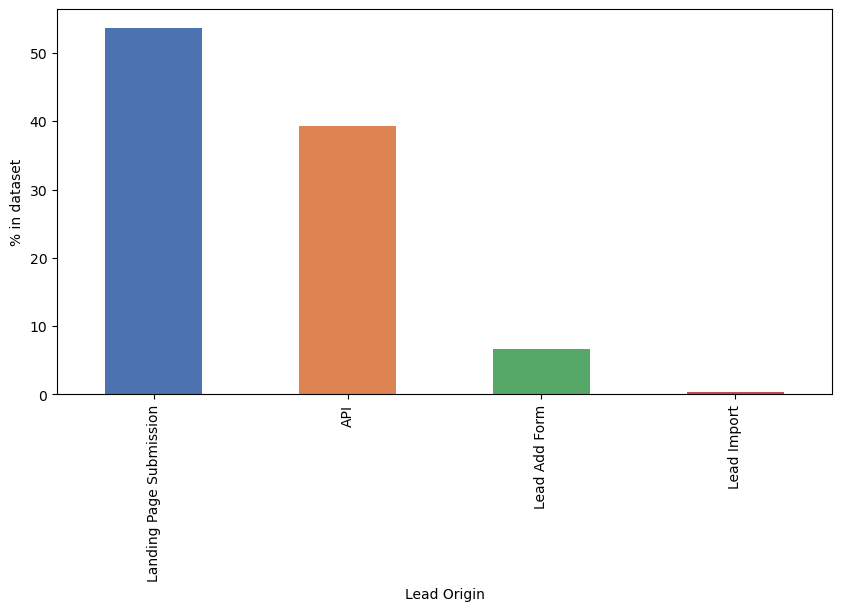

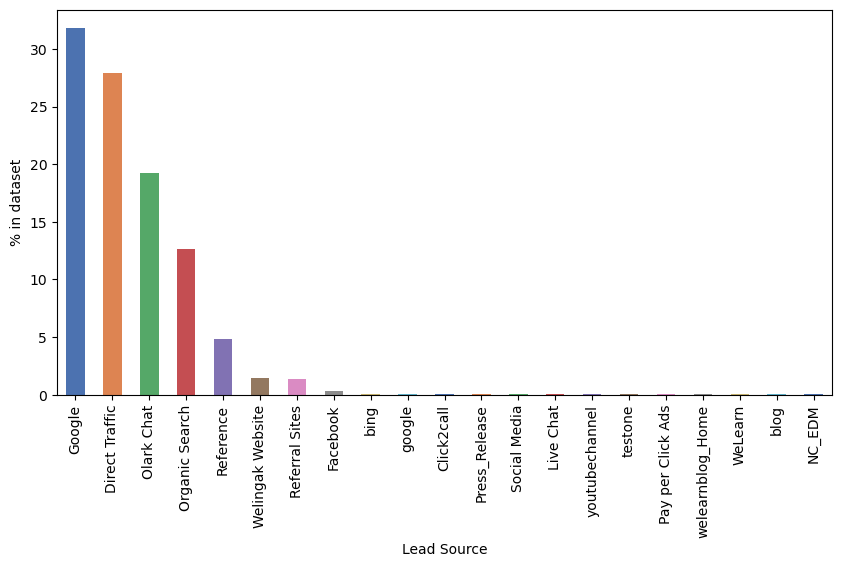

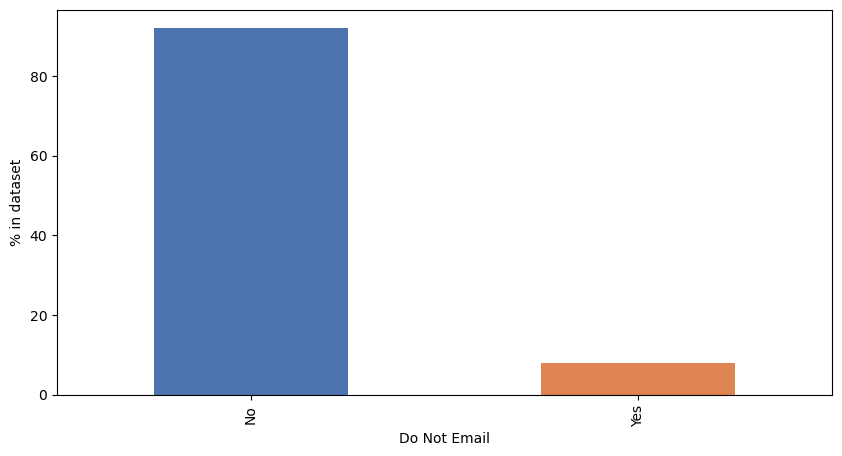

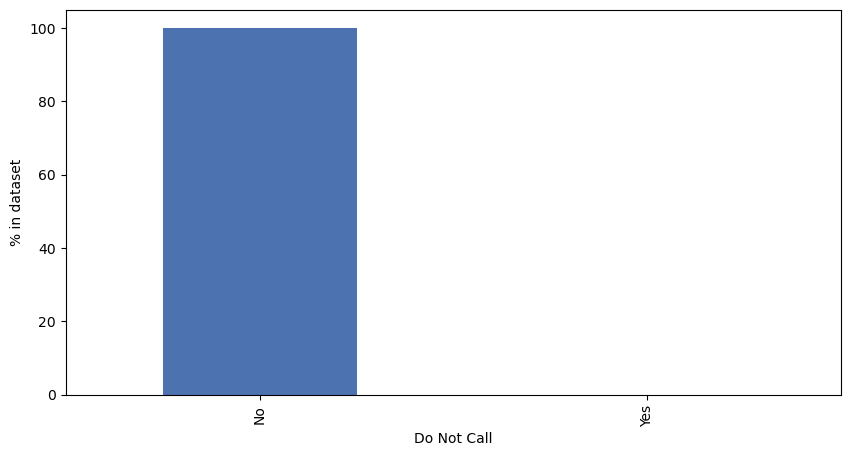

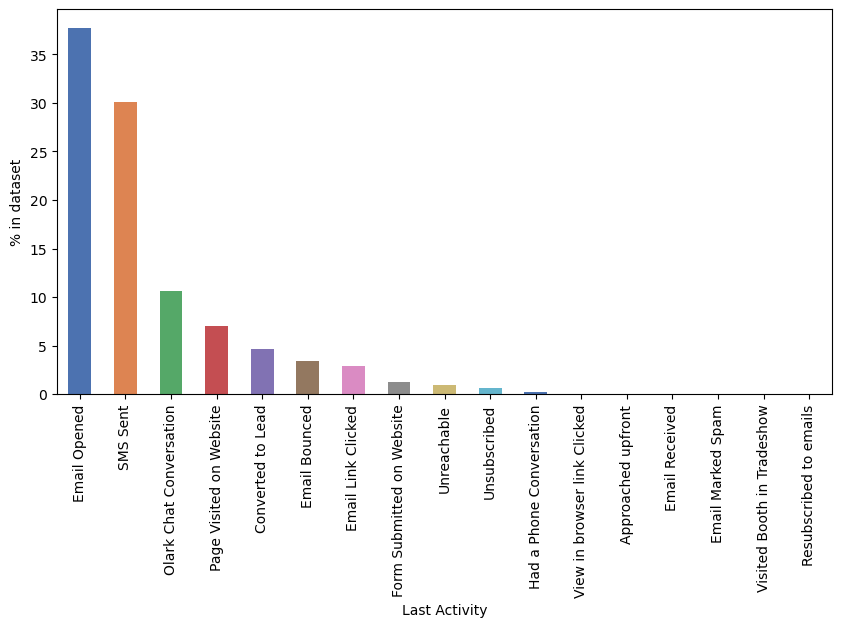

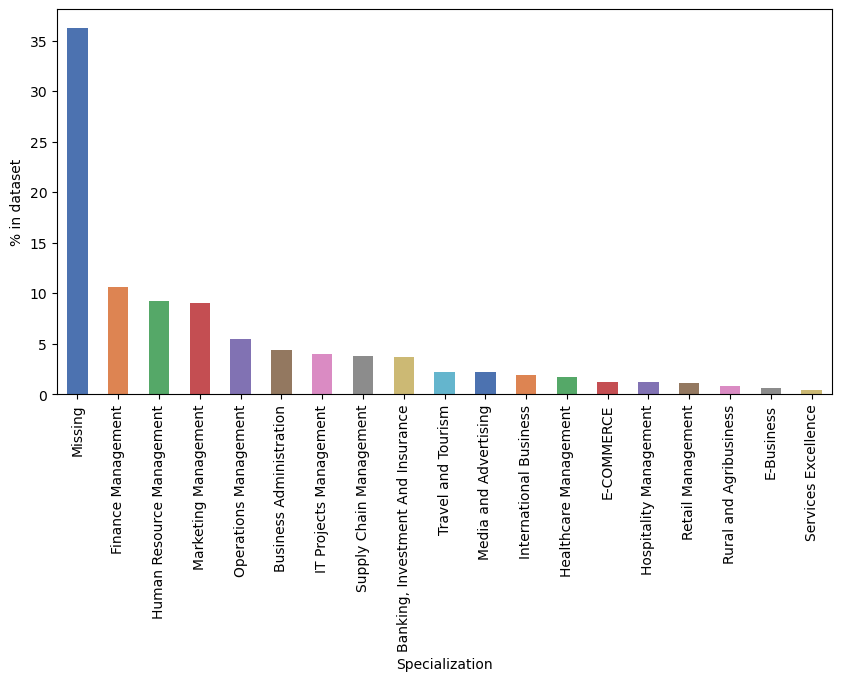

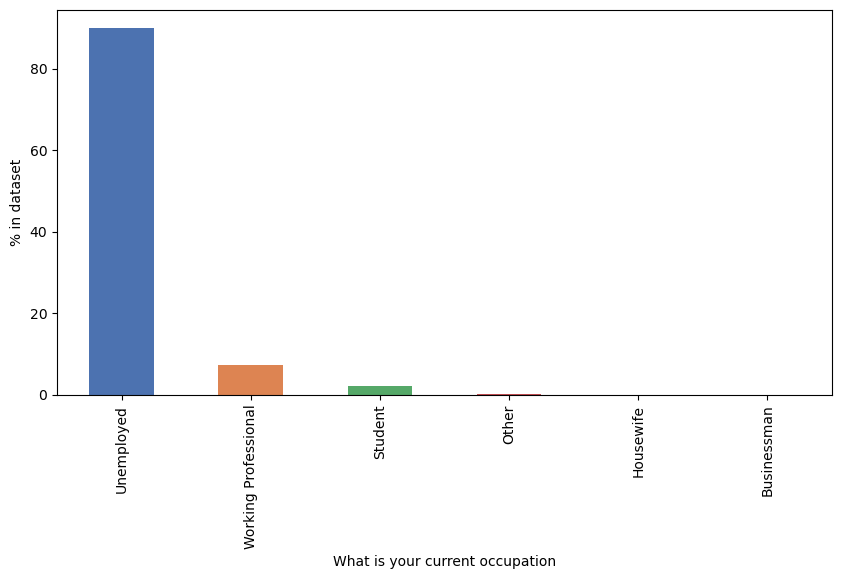

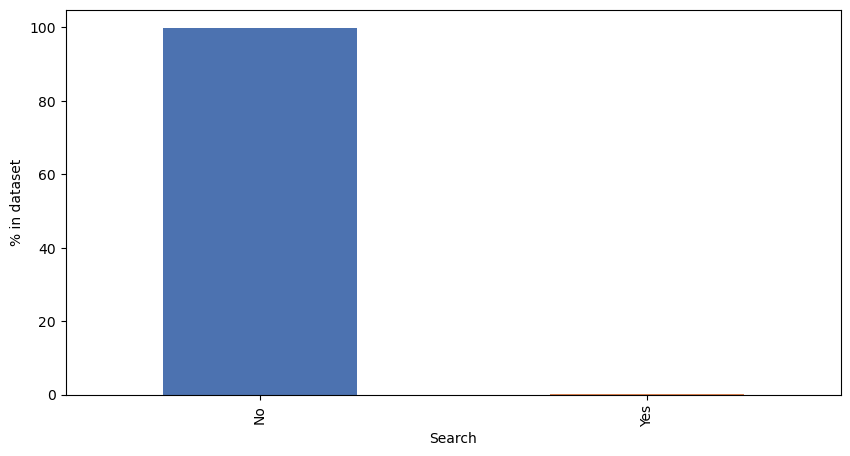

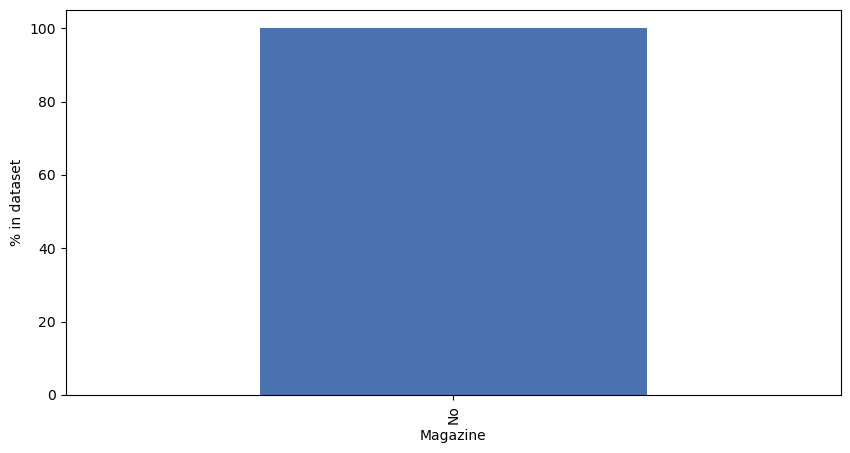

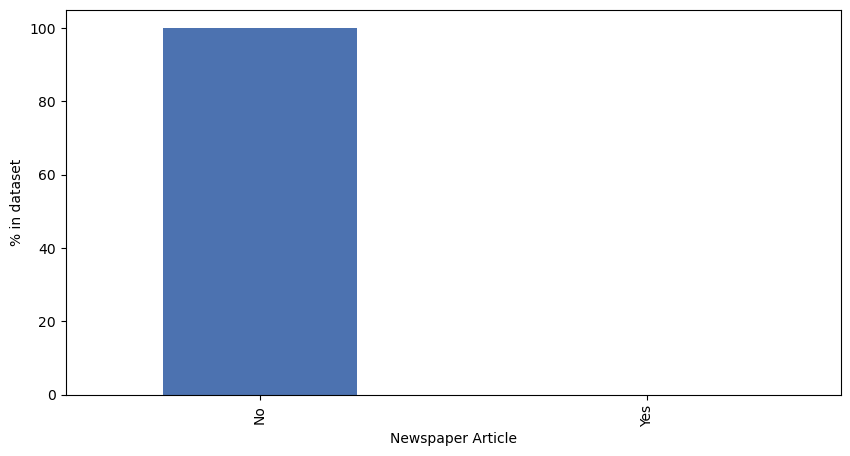

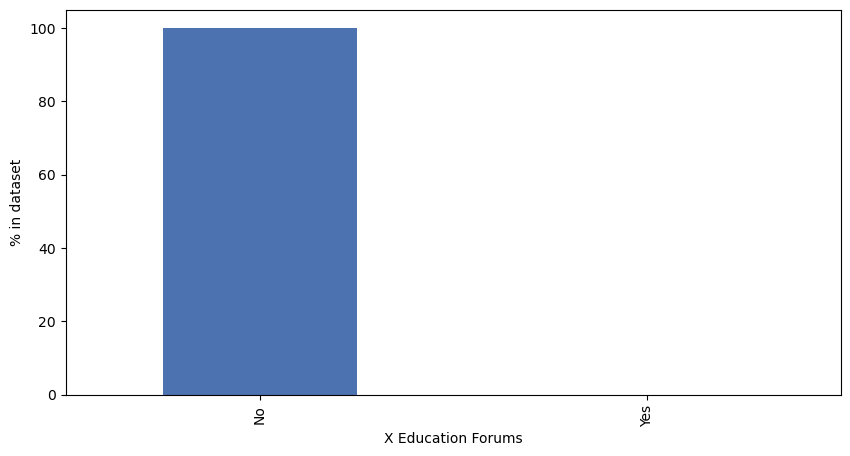

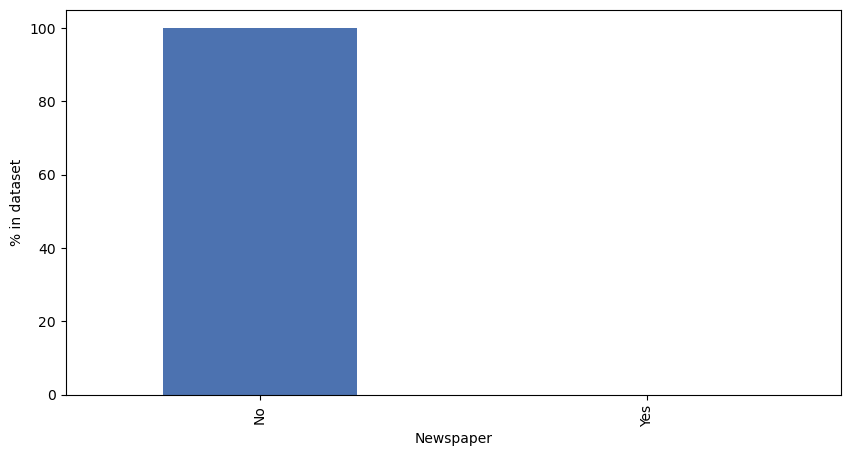

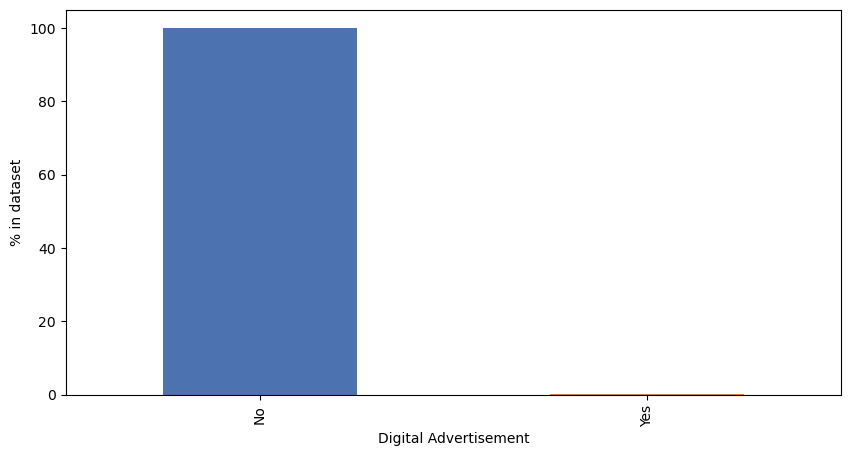

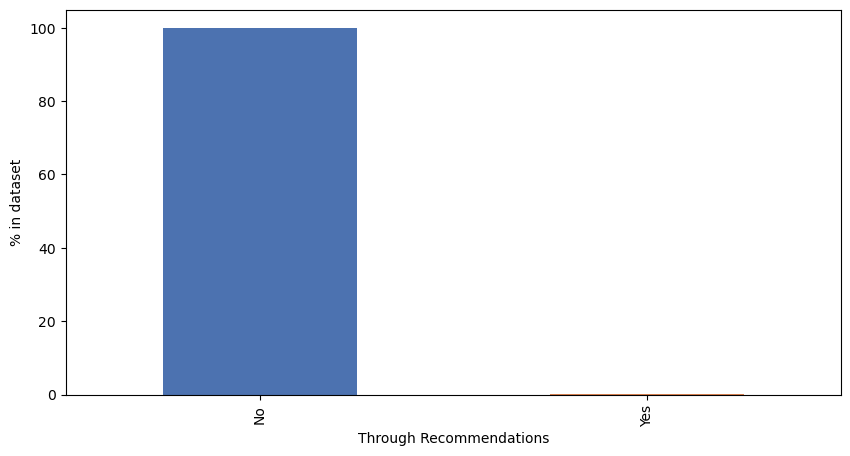

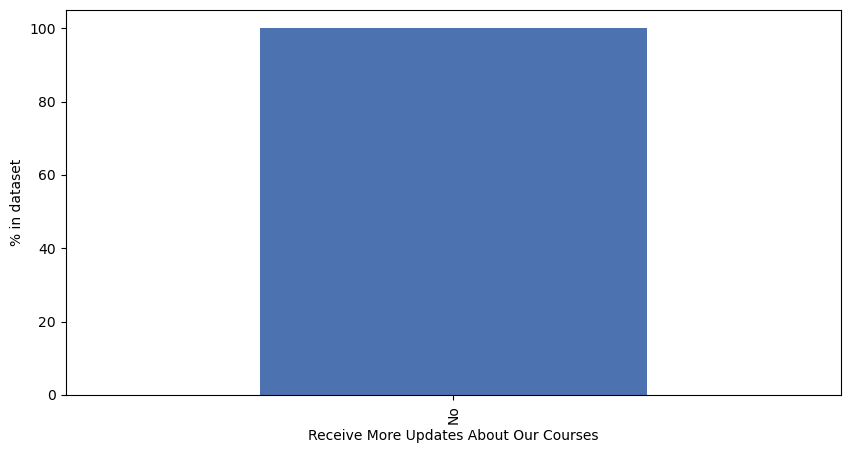

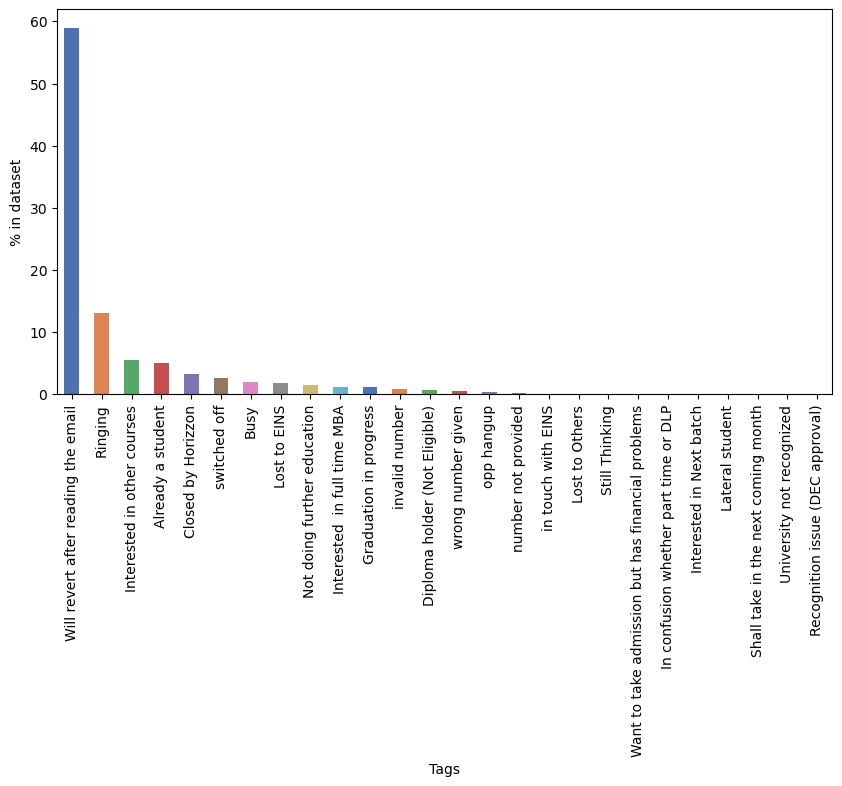

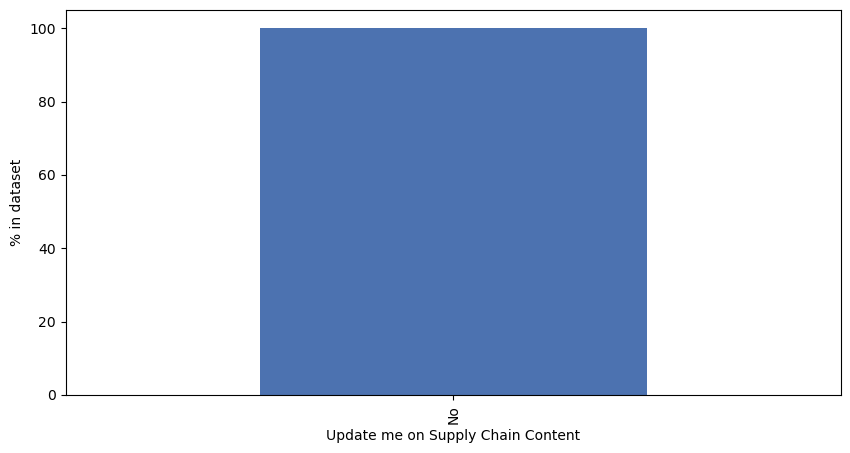

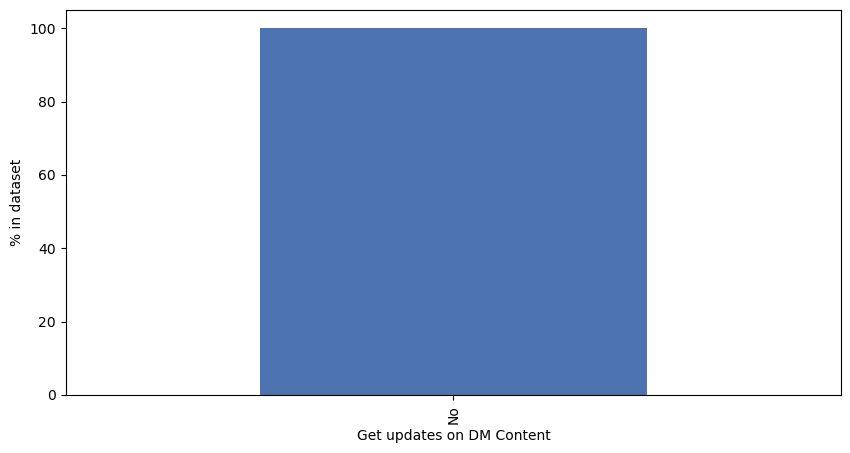

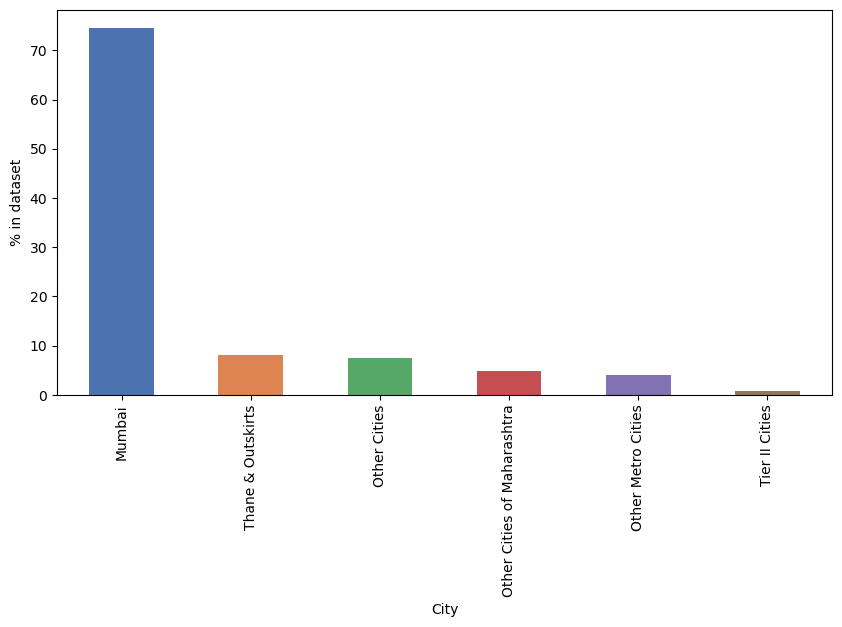

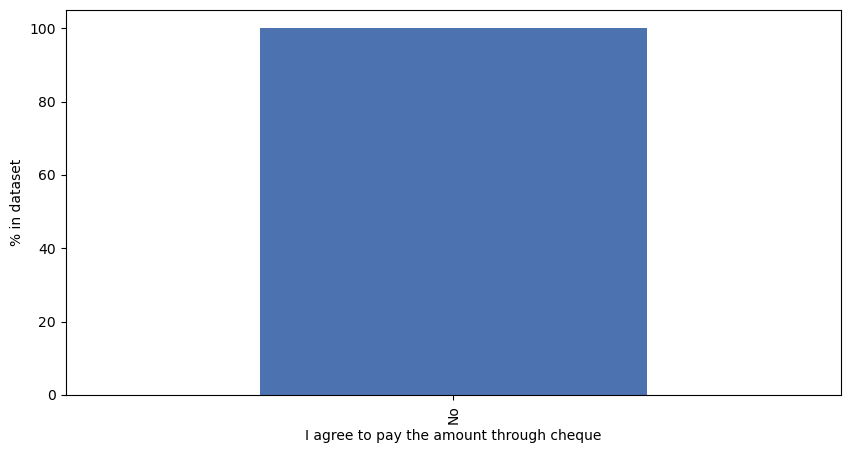

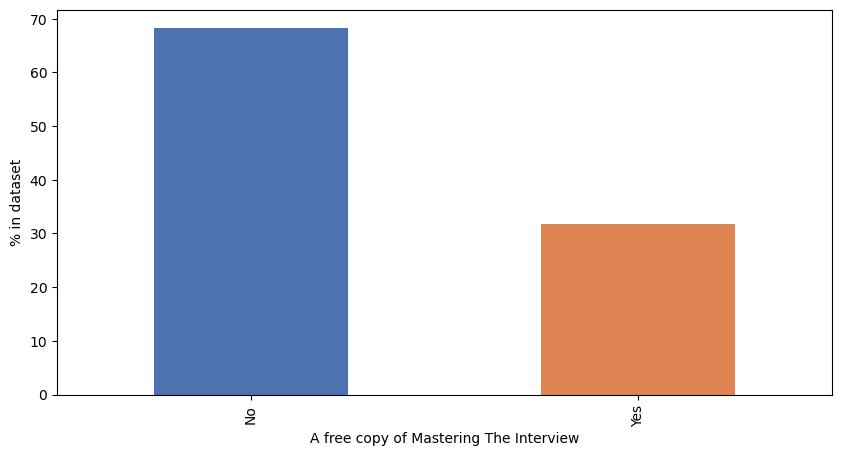

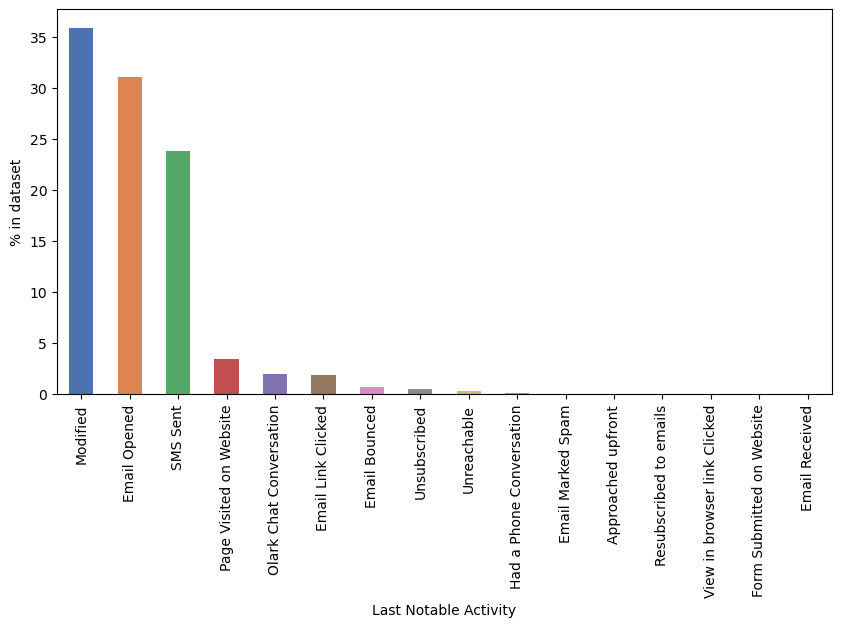

In [30]:
for col in cat_cols:
    fig = plt.figure(figsize = (10, 5))
    (lead[col].value_counts(normalize=True)*100).plot.bar(color=sns.color_palette('deep'))
    plt.xlabel(col)
    plt.ylabel("% in dataset")
    plt.show()



variables like 'Do Not Call', 'search','magazine', 'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content', 'I agree to pay the amount through cheque' has value more than 99% of population in single category, so these variables are not going to add any value. Therefore I am deleting these columns through our leads dataset

In [31]:
# delete irrelevant columns
del_col=['Do Not Call','Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque']

lead.drop(del_col, axis = 1, inplace = True)


In [32]:
lead.shape

(9103, 15)

# Step 4: Data Visualization

In [33]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9103 non-null   object 
 1   Lead Number                             9103 non-null   int64  
 2   Lead Origin                             9103 non-null   object 
 3   Lead Source                             9103 non-null   object 
 4   Do Not Email                            9103 non-null   object 
 5   Converted                               9103 non-null   int64  
 6   TotalVisits                             9103 non-null   float64
 7   Total Time Spent on Website             9103 non-null   int64  
 8   Page Views Per Visit                    9103 non-null   float64
 9   Last Activity                           9103 non-null   object 
 10  Specialization                          9103 non-null   obje

In [34]:
cat_cols=[ 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity']

cont_cols=['TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit']


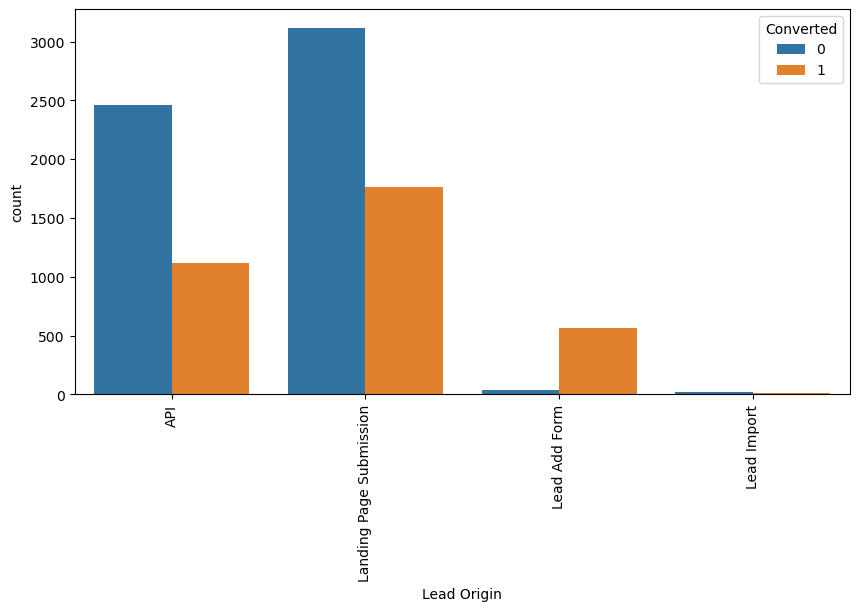

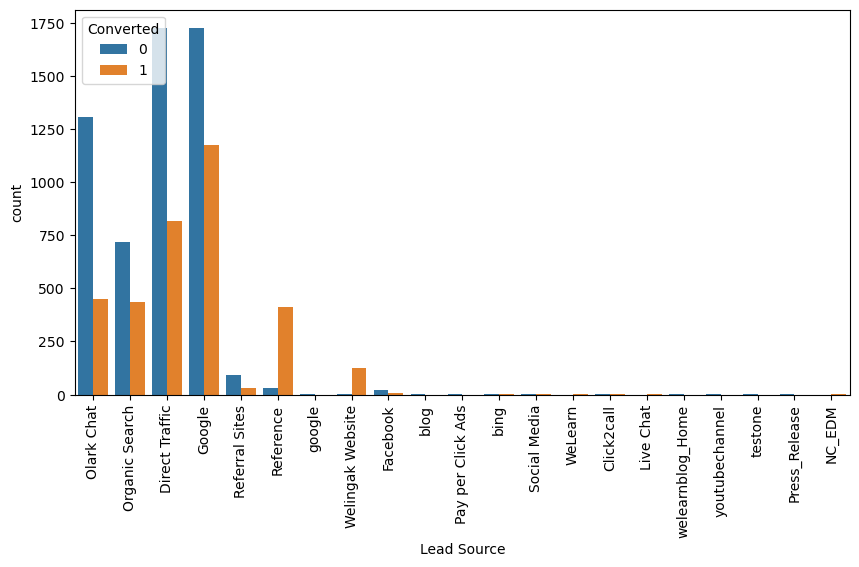

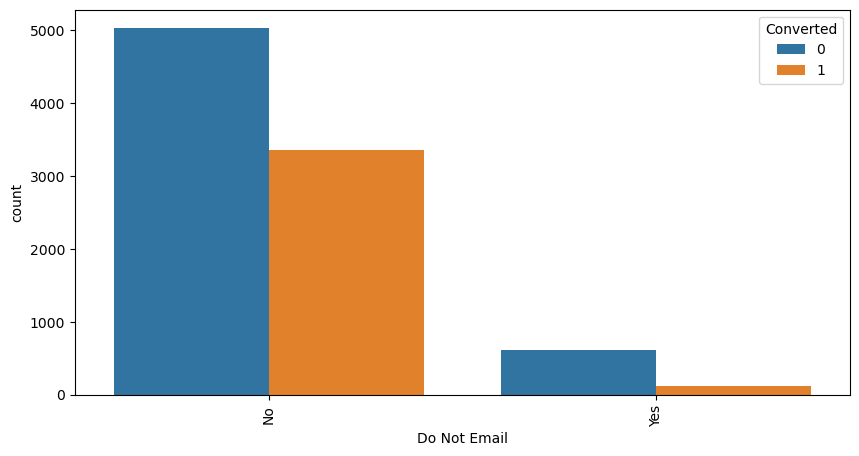

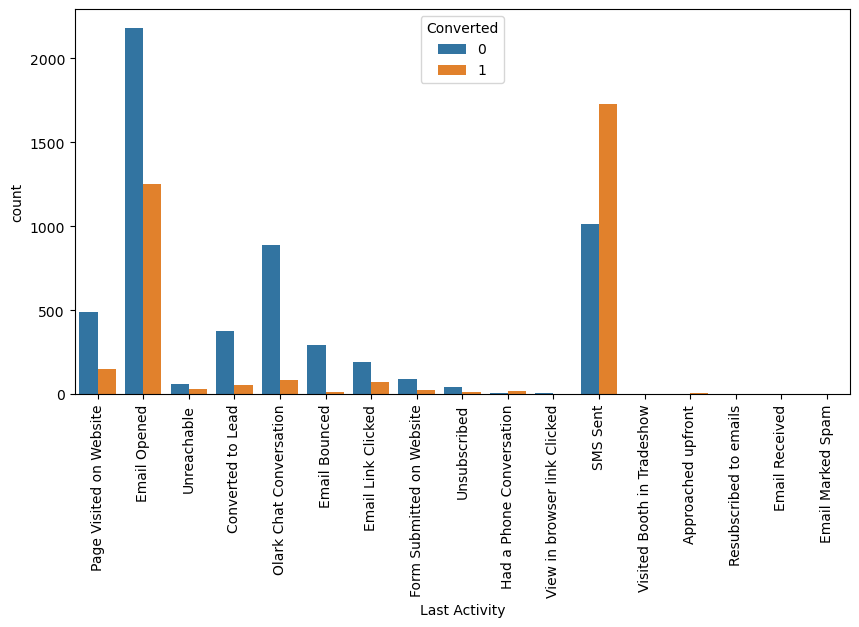

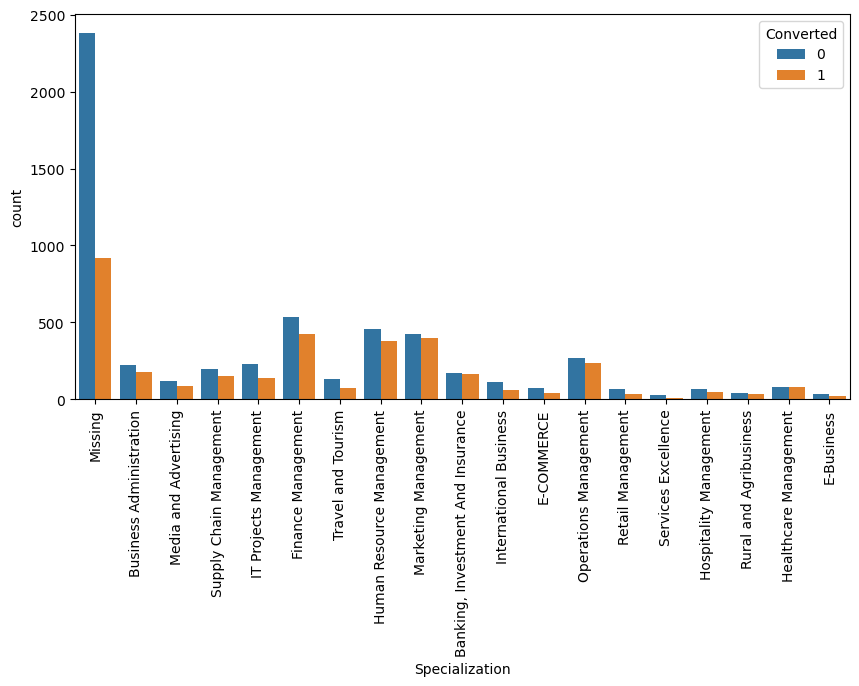

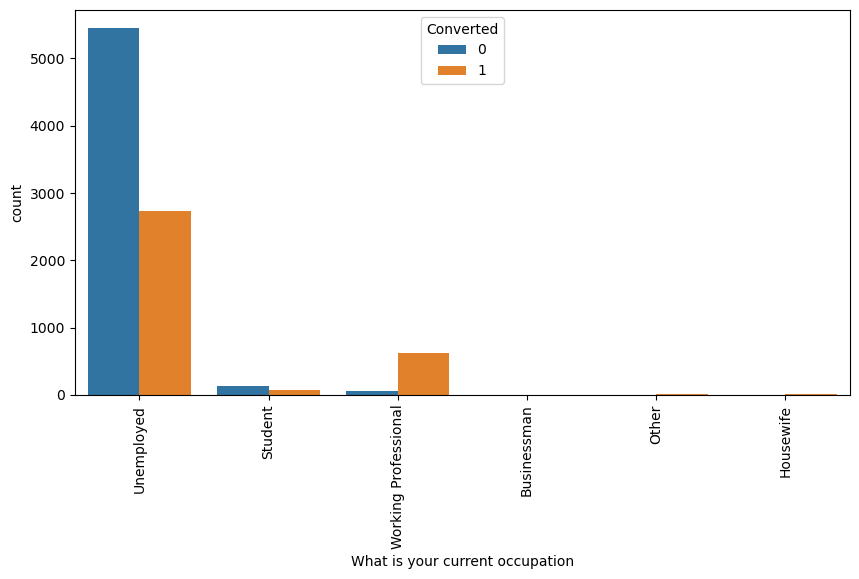

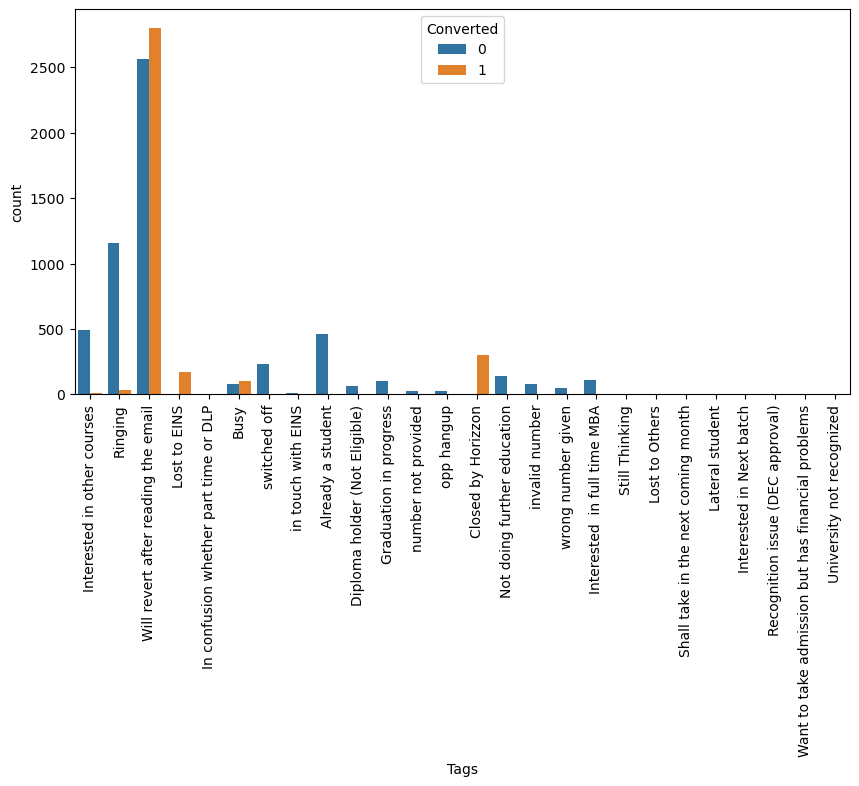

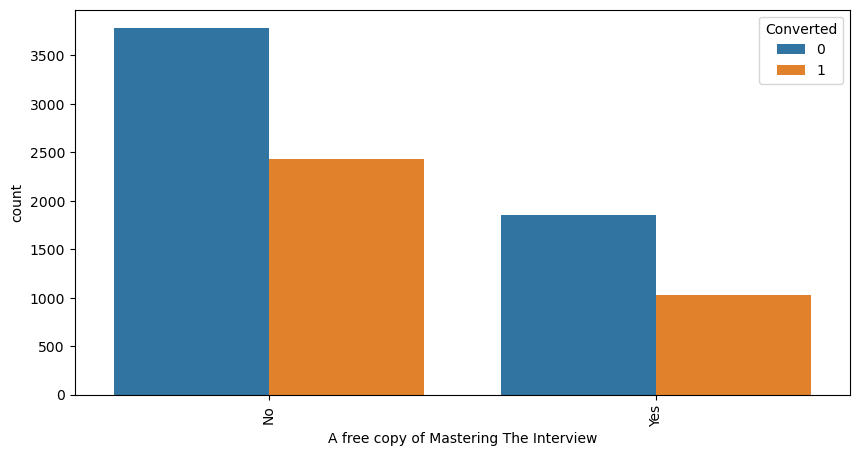

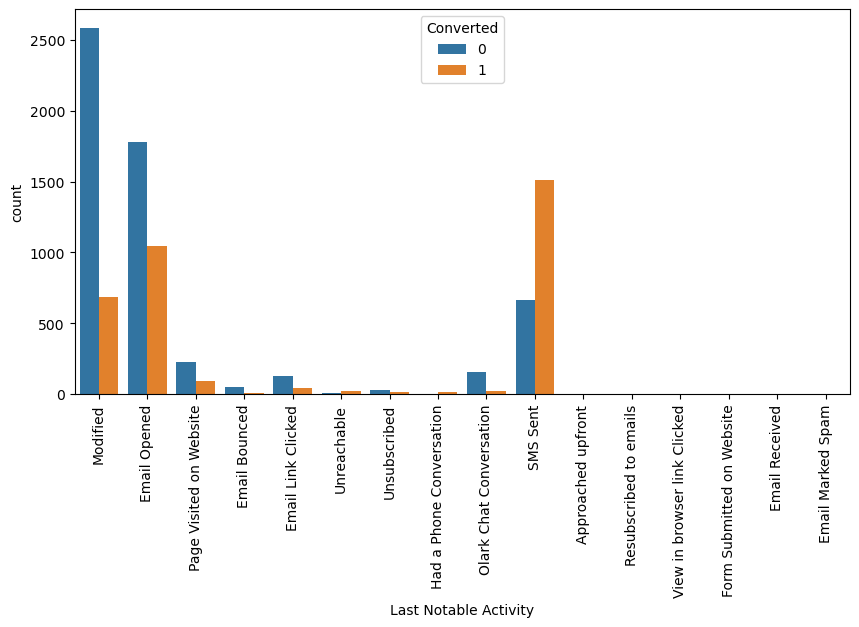

In [35]:
# Creating a function "univariate" to perform analysis one single variable with respect to target variable
for col in cat_cols:
    plt.figure(figsize=(10, 5))
    
    sns.countplot(x = col, hue = "Converted", data = lead)
    plt.xticks(rotation = 90)
    plt.show()



Lead_origin
1) most of the leads origniate from API and landing page submission, but lead add form has highest conversion factor
2)we should work on improving the quality of leads coming from API and landing page submission

Lead_source
1) most of leads are generated by google and direct traffic
2) most of the volume is concentrated in top4 lead sources
3) Reference has maximum conversion rate followed by wellingak website

DO_not_email
1)NO response has generated most of the leads and conversion rate is similar across these categories

last_activity
1) Customers whose lst activity is email_opened and sms sent has highest number of leads
2) but the conversion rate in sms sent is highest

Specialization
Distiribution is same across categories

what is your current occupation
1) majority of volume is coming from unemployed
2) working professionals have highest conversion rate but it has negligible volume

Tags
1) most of the volume is in will revert after reading email category and it has very good conversion rate as well

A free copy of Mastering The Interview
Similar conversion rate across both the categories


Last Notable Activity  
this variable insight is similar to last_activity variable

In [36]:
# reduce categories for few of the categorical variables like lead source, last_activity, tags, last notable activity

catg = lead['Lead Source'].unique()

# reduce categories
lead['Lead Source'] = lead['Lead Source'].replace(catg[8:], 'Others')


In [37]:
catg = lead['Last Activity'].unique()
catg

lead['Last Activity'] = lead['Last Activity'].replace(catg[-5:], 'Others')

In [38]:
catg = lead['Tags'].unique()
catg

lead['Tags'] = lead['Tags'].replace(catg[-8:], 'Others')

In [39]:
catg = lead['Last Notable Activity'].unique()
catg

lead['Last Notable Activity'] = lead['Last Notable Activity'].replace(catg[-6:], 'Others')

In [40]:
lead.shape

(9103, 15)

In [41]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9103 non-null   object 
 1   Lead Number                             9103 non-null   int64  
 2   Lead Origin                             9103 non-null   object 
 3   Lead Source                             9103 non-null   object 
 4   Do Not Email                            9103 non-null   object 
 5   Converted                               9103 non-null   int64  
 6   TotalVisits                             9103 non-null   float64
 7   Total Time Spent on Website             9103 non-null   int64  
 8   Page Views Per Visit                    9103 non-null   float64
 9   Last Activity                           9103 non-null   object 
 10  Specialization                          9103 non-null   obje

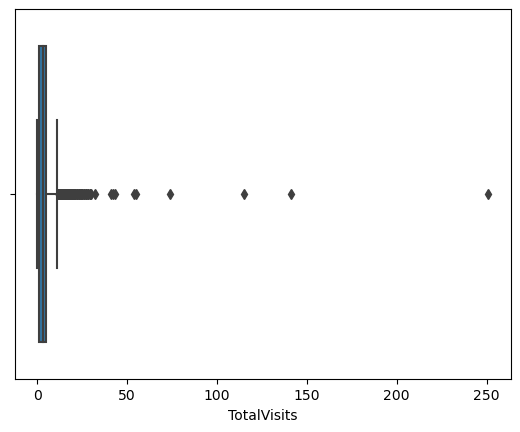

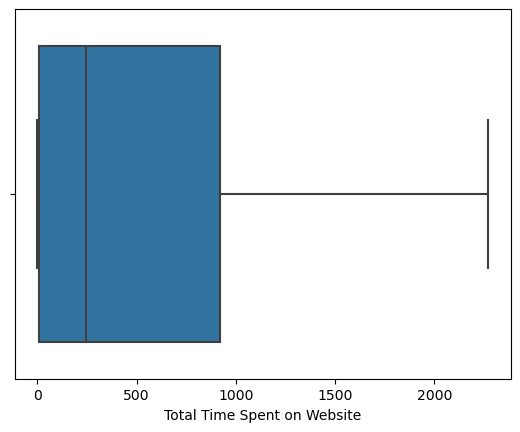

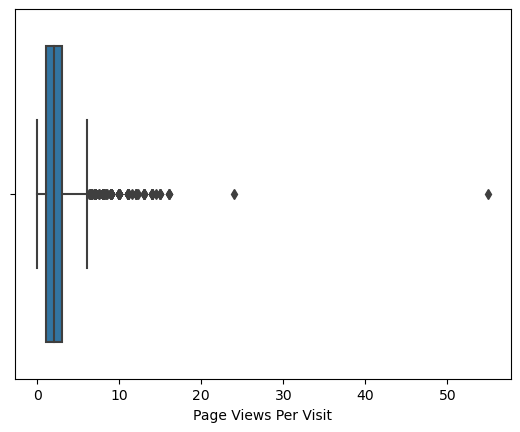

In [42]:
# NUmerical variables data visualization
cont_cols=['TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit']


for col in cont_cols:
    sns.boxplot(lead[col])
    plt.show()


total visits and page view per visit columns have outlier

In [43]:
lead[cont_cols].describe([0.05, .25, .5, .95, 0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000
mean,3.445238,481.350104,2.362820
std,4.854853,545.066142,2.161418
min,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000
25%,1.000000,9.000000,1.000000
50%,3.000000,244.000000,2.000000
95%,10.000000,1556.900000,6.000000
99%,17.000000,1838.960000,9.000000
max,251.000000,2272.000000,55.000000


first and last columns have some outlier, I think we should cap the values at 99th percentile

In [44]:
#capping
lead['TotalVisits'][lead['TotalVisits'] >=17]=17
lead['Page Views Per Visit'][lead['Page Views Per Visit'] >=9]=9

In [45]:
lead[cont_cols].describe([0.05, .25, .5, .95, 0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000
mean,3.332747,481.350104,2.334002
std,3.252420,545.066142,1.985712
min,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000
25%,1.000000,9.000000,1.000000
50%,3.000000,244.000000,2.000000
95%,10.000000,1556.900000,6.000000
99%,17.000000,1838.960000,9.000000
max,17.000000,2272.000000,9.000000


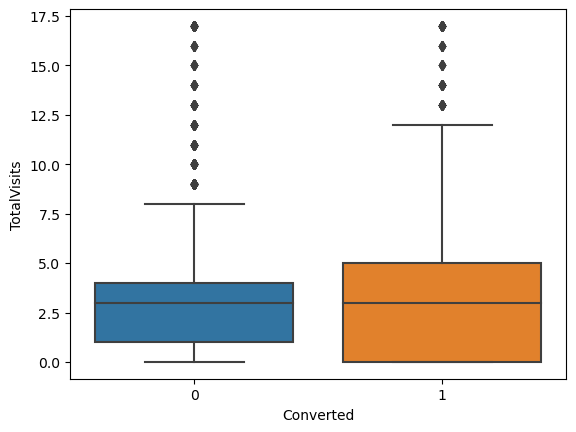

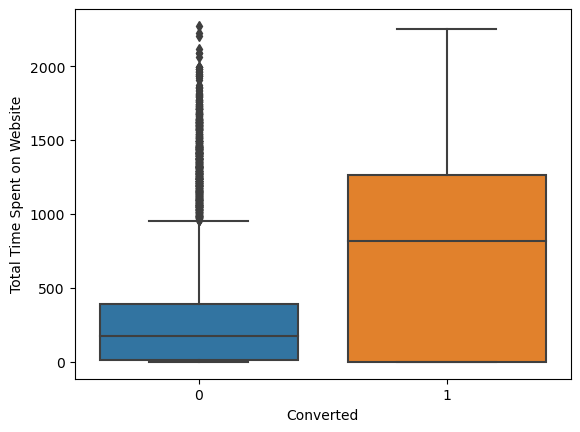

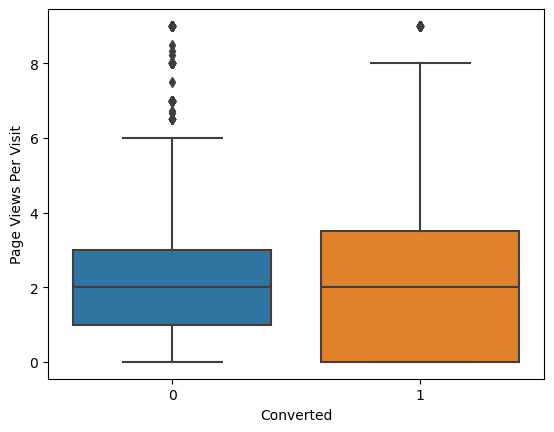

In [46]:
# look at the box plot distribution of these vars wrt conversion rate
for col in cont_cols:
    sns.boxplot(y = col , x = 'Converted', data = lead)
    plt.show()


1) total visit median is same across converted and non converted leads
2) people who are spending more time on website has better conversion rate
3) page visit has also same median across converted and non converted leads

# Dummy variable creation

In [47]:
lead.shape


(9103, 15)

In [48]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9103 non-null   object 
 1   Lead Number                             9103 non-null   int64  
 2   Lead Origin                             9103 non-null   object 
 3   Lead Source                             9103 non-null   object 
 4   Do Not Email                            9103 non-null   object 
 5   Converted                               9103 non-null   int64  
 6   TotalVisits                             9103 non-null   float64
 7   Total Time Spent on Website             9103 non-null   int64  
 8   Page Views Per Visit                    9103 non-null   float64
 9   Last Activity                           9103 non-null   object 
 10  Specialization                          9103 non-null   obje

In [49]:
cat_cols=[ 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity']

In [50]:
cat_cols

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [51]:
# convert yea nd no to 1 nad 0
lead['Do Not Email']=lead['Do Not Email'].map({'Yes': 1, 'No': 0})

#status1 = pd.get_dummies(bike['season'], drop_first = True)

In [52]:
lead[ 'A free copy of Mastering The Interview']=lead[ 'A free copy of Mastering The Interview'].map({'Yes': 1, 'No': 0})


In [53]:
cat_cols=[ 'Lead Origin', 'Lead Source', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'Last Notable Activity']


status1 = pd.get_dummies(lead[cat_cols], drop_first = True)
lead_1 = pd.concat([lead, status1], axis = 1)
lead_1=lead_1.drop(cat_cols,1)

In [54]:
lead_1.head()

,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0.0,0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,5.0,674,2.5,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,1,2.0,1532,2.0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,1.0,305,1.0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,1,2.0,1428,1.0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


# Step 5: Splitting the Data into Training and Testing Sets

In [55]:


from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively

# lead_train, lead_test = train_test_split(lead_1, train_size = 0.7, test_size = 0.3, random_state = 100)

In [56]:
# dropping columns not relevant for modelling like the unique identifiers and the target variable
lead_1=lead_1.drop(['Lead Number','Prospect ID'], 1)
X = lead_1.drop(['Converted'], 1)
y=lead_1['Converted']


In [57]:

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Step 6: Feature Scaling


In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
#apply min max scaling
cont_cols=['TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit']

scaler = StandardScaler()

X_train[cont_cols] = scaler.fit_transform(X_train[cont_cols])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
7962,0,-0.105932,1.476324,-0.420056,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5520,0,1.113025,-0.771066,2.354047,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1962,0,0.503547,-0.571257,0.084327,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1566,0,3.246199,1.393834,0.588709,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
9170,0,-1.020149,-0.881052,-1.176630,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [60]:
### Checking the conversion Rate

conv = (sum(lead_1['Converted'])/len(lead_1['Converted'].index))*100
conv

38.02043282434362

We have almost 38% conversion rate

# Step 7: Looking at Correlations


In [61]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

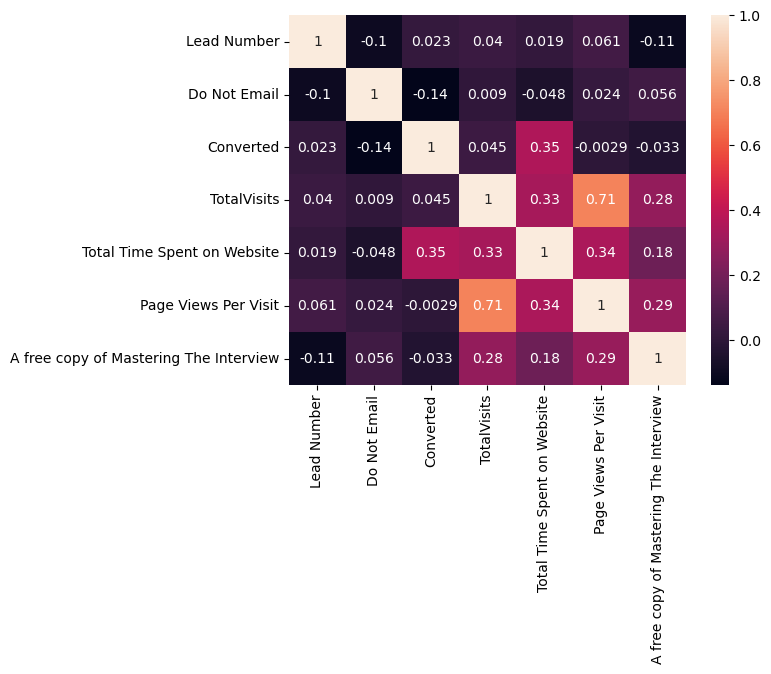

In [62]:
# Let's see the correlation matrix 
      # Size of the figure
sns.heatmap(lead.corr(),annot = True)
plt.show()

1) Total visits and page views per visit variables are highly correlated
2) total time spend on website is highly correlated to the conversion rate
3) conversion rate and do not email fields are inversely correlated
   

# Step 8: Model Building


Run your firsst logistic model

In [63]:

# Logistic regression model
import statsmodels.api as sm
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6292
Model Family:                Binomial   Df Model:                           79
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1616.1
Date:                Sun, 16 Apr 2023   Deviance:                       3232.1
Time:                        17:29:08   Pearson chi2:                 1.13e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5598
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4107      1.669     -1.444      0.149      -5.682       0.861
Do Not Email                                            -1.3358      0.276     -4.840      0.000      -1.877      -0.795
TotalVisits                                              0.2397      0.068      3.539      0.000       0.107       0.373
Total Time Spent on Website                              1.1204      0.055     20.501      0.000       1.013       1.228
Page Views Per Visit                                    -0.2478      0.075     -3.288      0.001      -0.395      -0.100
A free copy of Mastering The Interview                  -0.3398      0.146     -2.321      0.020      -0.627      -0.053
Lead Origin_Landing Page Submission                     -0.9657      0.180     -5.371      0.000      -1.318      -0.613
Lead Origin_Lead Add Form                                3.2636      0.917      3.559      0.000       1.466       5.061
Lead Origin_Lead Import                                  2.0944      0.966      2.169      0.030       0.202       3.987
Lead Source_Google                                      -0.0402      0.155     -0.260      0.795      -0.343       0.263
Lead Source_Olark Chat                                   0.6260      0.210      2.977      0.003       0.214       1.038
Lead Source_Organic Search                               0.2367      0.175      1.354      0.176      -0.106       0.579
Lead Source_Others                                      -0.7351      0.743     -0.990      0.322      -2.191       0.721
Lead Source_Reference                                   -0.5390      0.972     -0.555      0.579      -2.443       1.365
Lead Source_Referral Sites                              -0.2506      0.425     -0.590      0.555      -1.083       0.582
Lead Source_Welingak Website                             1.5343      1.173      1.309      0.191      -0.764       3.832
Lead Source_google                                     -24.0922   1.14e+05     -0.000      1.000   -2.23e+05    2.23e+05
Last Activity_Email Bounced                             -0.5247      0.666     -0.787      0.431      -1.830       0.781
Last Activity_Email Link Clicked                         0.8087      0.576      1.404      0.160      -0.320       1.937
Last Activity_Email Opened                               0.3682      0.339      1.086      0.277      -0.296       1.032
Last Activity_Form Submitted on Website                  0.1822      0.489      0.372      0.710      -0.777       1.141
Last Activity_Had a Phone Conversation                   1.8144      1.405      1.292      0.196      -0.939       4.567
Last Activity_Olark Chat Conversation                   -0

reading a model with these many variables is very difficult, so using RFE technique will pick top variables

# Feature Selection using RFE

In [64]:
# import logistic regression and import its object
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [65]:
# Import RFE and select 15 variables
from sklearn.feature_selection import RFE
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=15)             


In [66]:
# running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [67]:
#look at the features selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 37),
 ('Total Time Spent on Website', False, 5),
 ('Page Views Per Visit', False, 38),
 ('A free copy of Mastering The Interview', False, 35),
 ('Lead Origin_Landing Page Submission', False, 2),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 13),
 ('Lead Source_Google', False, 65),
 ('Lead Source_Olark Chat', False, 21),
 ('Lead Source_Organic Search', False, 40),
 ('Lead Source_Others', False, 64),
 ('Lead Source_Reference', False, 43),
 ('Lead Source_Referral Sites', False, 44),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_google', False, 29),
 ('Last Activity_Email Bounced', False, 27),
 ('Last Activity_Email Link Clicked', False, 45),
 ('Last Activity_Email Opened', False, 46),
 ('Last Activity_Form Submitted on Website', False, 60),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation', False, 20),
 ('Last Activity_Others', False, 14),
 ('Last A

In [68]:
# put all the features selected by rfe in a col
col = X_train.columns[rfe.support_]

In [69]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_google', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Hea

# Assess the model using stats model

In [70]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2053.9
Date:                Sun, 16 Apr 2023   Deviance:                       4107.7
Time:                        17:30:03   Pearson chi2:                 1.04e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4950
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3995      0.315     -7.627      0.000      -3.016      -1.783
Do Not Email                                            -1.4880      0.180     -8.284      0.000      -1.840      -1.136
Lead Origin_Lead Add Form                                2.5606      0.291      8.802      0.000       1.990       3.131
Lead Source_Welingak Website                             1.8260      0.790      2.313      0.021       0.278       3.374
Last Activity_Had a Phone Conversation                   1.9749      0.729      2.711      0.007       0.547       3.403
Specialization_Missing                                  -0.9551      0.083    -11.551      0.000      -1.117      -0.793
What is your current occupation_Unemployed              -1.4450      0.296     -4.883      0.000      -2.025      -0.865
What is your current occupation_Working Professional     1.1957      0.366      3.267      0.001       0.478       1.913
Tags_Busy                                                2.9336      0.291     10.093      0.000       2.364       3.503
Tags_Closed by Horizzon                                  8.0337      0.741     10.849      0.000       6.582       9.485
Tags_Lost to EINS                                        8.1898      0.743     11.016      0.000       6.733       9.647
Tags_Ringing                                            -1.2371      0.302     -4.101      0.000      -1.828      -0.646
Tags_Will revert after reading the email                 3.4987      0.194     18.010      0.000       3.118       3.879
Tags_switched off                                       -1.5607      0.624     -2.500      0.012      -2.784      -0.337
Tags_wrong number given                                -20.7326   1.18e+04     -0.002      0.999   -2.32e+04    2.32e+04
Last Notable Activity_SMS Sent                           2.6034      0.107     24.366      0.000       2.394       2.813
========================================================================================================================
"""

There is one variables with p value higher then 0.05,Tags_wrong number given.
lets drop this variable


drop What is your current occupation_Housewife variable

In [71]:
col1 = col.drop('Tags_wrong number given',1)

# rerun model
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2056.2
Date:                Sun, 16 Apr 2023   Deviance:                       4112.3
Time:                        17:31:27   Pearson chi2:                 1.05e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4946
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4473      0.318     -7.707      0.000      -3.070      -1.825
Do Not Email                                            -1.4963      0.179     -8.353      0.000      -1.847      -1.145
Lead Origin_Lead Add Form                                2.5697      0.292      8.815      0.000       1.998       3.141
Lead Source_Welingak Website                             1.8177      0.790      2.301      0.021       0.270       3.366
Last Activity_Had a Phone Conversation                   1.9782      0.731      2.708      0.007       0.546       3.410
Specialization_Missing                                  -0.9517      0.083    -11.518      0.000      -1.114      -0.790
What is your current occupation_Unemployed              -1.4697      0.298     -4.927      0.000      -2.054      -0.885
What is your current occupation_Working Professional     1.1875      0.369      3.216      0.001       0.464       1.911
Tags_Busy                                                3.0126      0.289     10.407      0.000       2.445       3.580
Tags_Closed by Horizzon                                  8.1043      0.741     10.944      0.000       6.653       9.556
Tags_Lost to EINS                                        8.2616      0.743     11.113      0.000       6.805       9.719
Tags_Ringing                                            -1.1541      0.300     -3.844      0.000      -1.743      -0.566
Tags_Will revert after reading the email                 3.5716      0.194     18.429      0.000       3.192       3.951
Tags_switched off                                       -1.4761      0.623     -2.368      0.018      -2.698      -0.254
Last Notable Activity_SMS Sent                           2.5893      0.106     24.379      0.000       2.381       2.797
========================================================================================================================
"""

# check multilcollinearity in between variables through VIF

In [72]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [73]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,What is your current occupation_Unemployed,5.65
11,Tags_Will revert after reading the email,4.31
10,Tags_Ringing,1.76
4,Specialization_Missing,1.69
1,Lead Origin_Lead Add Form,1.59
6,What is your current occupation_Working Profes...,1.52
13,Last Notable Activity_SMS Sent,1.50
2,Lead Source_Welingak Website,1.35
8,Tags_Closed by Horizzon,1.33
12,Tags_switched off,1.15


What is your current occupation_Unemployed has high VIF (GT 5), so we can drop this

In [74]:
# drop What is your current occupation_Unemployedvariable
col4 = col1.drop('What is your current occupation_Unemployed',1)

# rerun model
X_train_sm = sm.add_constant(X_train[col4])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2068.7
Date:                Sun, 16 Apr 2023   Deviance:                       4137.5
Time:                        17:33:51   Pearson chi2:                 1.03e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4926
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.7858      0.190    -19.938      0.000      -4.158      -3.414
Do Not Email                                            -1.4895      0.179     -8.334      0.000      -1.840      -1.139
Lead Origin_Lead Add Form                                2.5902      0.288      8.980      0.000       2.025       3.156
Lead Source_Welingak Website                             1.7819      0.789      2.260      0.024       0.236       3.328
Last Activity_Had a Phone Conversation                   1.9406      0.728      2.665      0.008       0.513       3.368
Specialization_Missing                                  -0.9713      0.082    -11.787      0.000      -1.133      -0.810
What is your current occupation_Working Professional     2.6031      0.233     11.177      0.000       2.147       3.060
Tags_Busy                                                2.9014      0.287     10.126      0.000       2.340       3.463
Tags_Closed by Horizzon                                  8.0042      0.740     10.823      0.000       6.555       9.454
Tags_Lost to EINS                                        8.1556      0.743     10.983      0.000       6.700       9.611
Tags_Ringing                                            -1.2711      0.298     -4.266      0.000      -1.855      -0.687
Tags_Will revert after reading the email                 3.4754      0.191     18.169      0.000       3.101       3.850
Tags_switched off                                       -1.5894      0.622     -2.553      0.011      -2.809      -0.369
Last Notable Activity_SMS Sent                           2.5752      0.106     24.355      0.000       2.368       2.782
========================================================================================================================
"""

In [75]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col4].columns
vif['VIF'] = [variance_inflation_factor(X_train[col4].values, i) for i in range(X_train[col4].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Tags_Will revert after reading the email,1.89
1,Lead Origin_Lead Add Form,1.59
4,Specialization_Missing,1.50
12,Last Notable Activity_SMS Sent,1.49
2,Lead Source_Welingak Website,1.35
5,What is your current occupation_Working Profes...,1.21
7,Tags_Closed by Horizzon,1.16
9,Tags_Ringing,1.14
0,Do Not Email,1.05
6,Tags_Busy,1.04


NOw all the VIFs are below 5 and all the p values are also below 0.05

# Step 9:Model evaluation

In [76]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:15]

array([0.22958867, 0.29225782, 0.00174989, 0.90827257, 0.00851762,
       0.21727215, 0.07714629, 0.42302475, 0.784744  , 0.42302475,
       0.01850146, 0.21727215, 0.02218728, 0.42302475, 0.90591912])

In [77]:
# Reshaping it into an array

y_train_pred = y_train_pred.reshape(-1)
y_train_pred[:15]

array([0.22958867, 0.29225782, 0.00174989, 0.90827257, 0.00851762,
       0.21727215, 0.07714629, 0.42302475, 0.784744  , 0.42302475,
       0.01850146, 0.21727215, 0.02218728, 0.42302475, 0.90591912])

In [78]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.229589
1,0,0.292258
2,0,0.001750
3,1,0.908273
4,0,0.008518


Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [79]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()


,Converted,Conversion_Prob,Predicted
0,0,0.229589,0
1,0,0.292258,0
2,0,0.001750,0
3,1,0.908273,1
4,0,0.008518,0


In [80]:
from sklearn import metrics
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8548336472065285


## Evaluate through confusion metrics

In [81]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3815  138]
 [ 787 1632]]


In [82]:
# overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))


0.8548336472065285


85% accuracy is pretty high

In [83]:
# Other metrics
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [84]:
#sensitivity

TP/(TP+FN)

0.6746589499793303

In [397]:
#  specificity
TN / float(TN+FP)

0.9170250442701745

In [85]:
#  false postive rate - predicting Conversion when customer does not have converted
print(FP/ float(TN+FP))

0.03491019478876802


In [86]:
# positive predictive value 
print (TP / float(TP+FP))

0.9220338983050848


In [87]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8289873967840069


All the evaluation metric shows model is performing well

# Step 10: ROC curve

An ROC curve demonstrates several things:

    It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
    The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
    The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.



In [88]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [89]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )


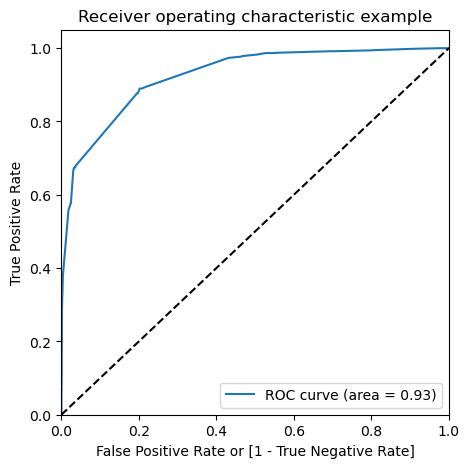

In [91]:
import matplotlib.pyplot as plt

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

area under the curve is 0.93, which is quite good

earlier we have choosed the 0.5 threshold like this only, now we will find optimal cutoff

# Step 11: Find Optimal cut

Find Optimal cutoff probability, that is the prob where we get balanced sensitivity and specificity


In [92]:
num = [float(x)/10 for x in range(10)]
for i in num:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.229589,0,1,1,1,0,0,0,0,0,0,0
1,0,0.292258,0,1,1,1,0,0,0,0,0,0,0
2,0,0.001750,0,1,0,0,0,0,0,0,0,0,0
3,1,0.908273,1,1,1,1,1,1,1,1,1,1,1
4,0,0.008518,0,1,0,0,0,0,0,0,0,0,0


In [93]:
# create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.702605  0.978090  0.534025
0.2   0.2  0.722536  0.973129  0.569188
0.3   0.3  0.832235  0.876809  0.804958
0.4   0.4  0.832078  0.876395  0.804958
0.5   0.5  0.854834  0.674659  0.965090
0.6   0.6  0.855461  0.674659  0.966102
0.7   0.7  0.854206  0.665978  0.969390
0.8   0.8  0.824388  0.577098  0.975715
0.9   0.9  0.820935  0.558082  0.981786


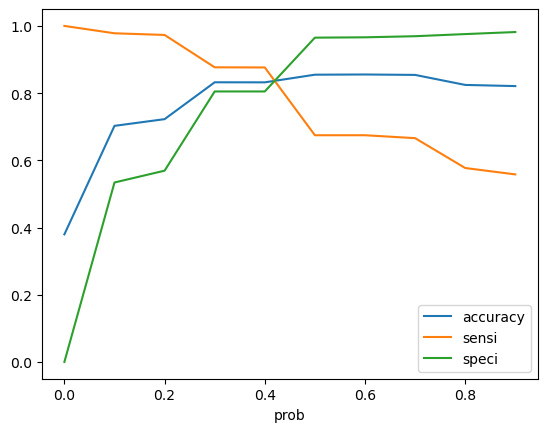

In [94]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.45 is the optimum point to take it as a cutoff probability

In [110]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.45 else 0)

y_train_pred_final.head()


,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.229589,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.292258,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.001750,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.908273,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.008518,0,1,0,0,0,0,0,0,0,0,0,0


In [111]:
# recheck accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8553044569993723

In [112]:
# again create confusion metrics
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3808,  145],
       [ 777, 1642]], dtype=int64)

In [113]:
# relook at confusion matrix
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [114]:
# sensitivity
TP / float(TP+FN)

0.6787928896238115

In [115]:
#specificity
TN / float(TN+FP)

0.963318998229193

In [116]:
#false postive rate 
print(FP/ float(TN+FP))

0.036681001770806985


In [117]:
# Positive predictive value 
print (TP / float(TP+FP))

0.9188584219362059


In [118]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8305343511450382


All these metrics signigfies models good preditive power

## Precision and Recall

Precision

TP / TP + FP


In [119]:
print (TP / float(TP+FP))

0.9188584219362059


Recall

TP / TP + FN


In [120]:
print (TP / float(TP+ FN))

0.6787928896238115


## Precision and recall tradeoff

In [121]:
from sklearn.metrics import precision_recall_curve

In [122]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: Converted, Length: 6372, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: Predicted, Length: 6372, dtype: int64)

In [123]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

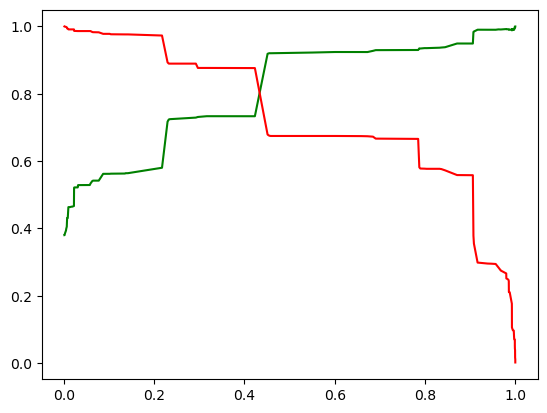

In [124]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

 from above curve 0.45 is the optimum point to take as a cutoff probability using Precision-Recall

In [125]:
y_train_pred_final['final_predicted_prerec'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.45 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,final_predicted_prerec
0,0,0.229589,0,1,1,1,0,0,0,0,0,0,0,0,0
1,0,0.292258,0,1,1,1,0,0,0,0,0,0,0,0,0
2,0,0.001750,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.908273,1,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.008518,0,1,0,0,0,0,0,0,0,0,0,0,0


In [126]:
# again create confusion metrics
confusion3 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted_prerec )
confusion3

array([[3808,  145],
       [ 777, 1642]], dtype=int64)

In [127]:
# relook at confusion matrix
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [128]:
# recheck accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted_prerec)

0.8553044569993723

In [129]:
# sensitivity
TP / float(TP+FN)

0.6787928896238115

In [130]:
#specificity
TN / float(TN+FP)

0.963318998229193

In [131]:
#false postive rate 
print(FP/ float(TN+FP))

0.036681001770806985


In [132]:
# Positive predictive value 
print (TP / float(TP+FP))


0.9188584219362059


In [133]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8305343511450382


based on both the optimal cutoff identification method, I am getting 0.45 as threshold


# Step 12: Prediction on test set

In [134]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [135]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_Had a Phone Conversation,Specialization_Missing,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Tags_wrong number given,Last Notable Activity_SMS Sent
3504,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4050,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1
7201,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1196,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
8219,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [136]:
# drop the similar columns from X test as well
X_test_1 = X_test[col4]

In [137]:
# add constant
X_test_sm = sm.add_constant(X_test_1)

In [138]:
X_test_1.shape

(2731, 13)

In [139]:
#predict
y_test_pred = res.predict(X_test_sm)

In [140]:
y_test_pred[:10]

3504    0.006325
4050    0.992271
7201    0.062968
1196    0.006325
8219    0.987505
8747    0.217272
9048    0.058906
6524    0.022187
7693    0.062968
8187    0.296751
dtype: float64

In [141]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [142]:
# Let's see the head
y_pred_1.head()

,0
3504,0.006325
4050,0.992271
7201,0.062968
1196,0.006325
8219,0.987505


In [143]:
# To convert y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [144]:
y_test_df.head()

,Converted
3504,0
4050,1
7201,0
1196,0
8219,1


In [145]:
# create Lead ID as index
y_test_df['Lead ID'] = y_test_df.index

In [146]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [147]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [148]:
y_pred_final.head()

,Converted,Lead ID,0
0,0,3504,0.006325
1,1,4050,0.992271
2,0,7201,0.062968
3,0,1196,0.006325
4,1,8219,0.987505


In [149]:
#Rename the 0 column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_probability'})

y_pred_final.head()

,Converted,Lead ID,Converted_probability
0,0,3504,0.006325
1,1,4050,0.992271
2,0,7201,0.062968
3,0,1196,0.006325
4,1,8219,0.987505


In [150]:
# USe 0.35 threshold derived from ROC
y_pred_final['final_predicted'] = y_pred_final.Converted_probability.map(lambda x: 1 if x > 0.45 else 0)

y_pred_final.head()

,Converted,Lead ID,Converted_probability,final_predicted
0,0,3504,0.006325,0
1,1,4050,0.992271,1
2,0,7201,0.062968,0
3,0,1196,0.006325,0
4,1,8219,0.987505,1


In [151]:
print("Area under curve: ", metrics.roc_auc_score(y_pred_final.Converted, y_pred_final.final_predicted))

Area under curve:  0.8168534914298117


In [152]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.85463200292933

In [153]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2


array([[1649,   40],
       [ 357,  685]], dtype=int64)

In [154]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [155]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6573896353166987

In [156]:
# Let us calculate specificity
TN / float(TN+FP)

0.9763173475429248

In [157]:
#false postive rate 
print(FP/ float(TN+FP))

0.023682652457075192


In [158]:
# Positive predictive value 
print (TP / float(TP+FP))


0.9448275862068966


In [159]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8220338983050848


In [161]:
# print final classification report
from sklearn.metrics import classification_report
print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1689
           1       0.94      0.66      0.78      1042

    accuracy                           0.85      2731
   macro avg       0.88      0.82      0.83      2731
weighted avg       0.87      0.85      0.85      2731



out of all the predicted lead, 94% got converted
F1 score 0.78 close to 1, shows model does a good job 